In [109]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy.stats
from scipy.special import boxcox, inv_boxcox


def ccc(array1, array2):
    "concordance correlation from wiki definition"
    sigx = np.std(array1)
    sigy = np.std(array2)
    corr = np.corrcoef(array1, array2)[0][1]
    mux = np.mean(array1)
    muy = np.mean(array2)
    return (2*corr*sigx*sigy) / (sigx**2 + sigy**2 + (mux - muy)**2)


In [108]:
root = 'jsons_new'
predicted_arousals = []
actual_arousals = []
predicted_valence = []
actual_valence = []
mse_errs_arousal = []
abs_errs_arousal = []
mse_errs_valence = []
abs_errs_valence = [] 

for folder in os.listdir(root):
    path = os.path.join(root, folder)

    if "DS" not in path:
        print (f"folder: {folder}")

        for file in os.listdir(path):
            with open (os.path.join(path, file)) as f:
                if "DS" not in os.path.join(path, file):
                    data = json.load(f)
                    predicted_arousals  = data['predicted_arousal'] + predicted_arousals
                    actual_arousals  = data['actual_arousal'] + actual_arousals

                    predicted_valence  = data['predicted_valence'] + predicted_valence
                    actual_valence  = data['actual_valence'] + actual_valence

                    mse_errs_arousal.append(((np.array(predicted_arousals) - actual_arousals)**2).sum() / len(actual_arousals))
                    abs_errs_arousal.append((np.abs(np.array(predicted_arousals) - actual_arousals)).sum() / len(actual_arousals))

                    mse_errs_valence.append(((np.array(predicted_valence) - actual_valence)**2).sum() / len(actual_valence))
                    abs_errs_valence.append((np.abs(np.array(predicted_valence) - actual_valence)).sum() / len(actual_valence))
        print (f"pcc arou {np.corrcoef(predicted_arousals, actual_arousals)[0][1]} ccc arou {ccc(actual_arousals, predicted_arousals)}")
        print (f"pcc val {np.corrcoef(predicted_valence, actual_valence)[0][1]} ccc val {ccc( actual_valence, predicted_valence)}")
        print (f"mse arou {np.mean(mse_errs_arousal)} std arou {np.std(mse_errs_arousal)}")
        print (f"mse val {np.mean(mse_errs_valence)} std val {np.std(mse_errs_valence)}")
        print (f"mae arou {np.mean(abs_errs_arousal)} std arou {np.std(abs_errs_arousal)}")
        print (f"mae val {np.mean(abs_errs_valence)} std val {np.std(abs_errs_valence)}")


folder: loso,adapted-True,reducedsecond-True,hog-False,affect-False,0.001,0.9,0.0005
pcc arou 0.5533589764538653 ccc arou 0.41748079275029226
pcc val 0.548493938893216 ccc val 0.40890605358757864
mse arou 0.004447917587444379 std arou 0.0009738202660587473
mse val 0.0021040178107789836 std val 0.00054138523587721
mae arou 0.0502389432142496 std arou 0.005890243397445032
mae val 0.028607189759294733 std val 0.005114180734194863
folder: secondattempt,inter,adapted-False,reducedsecond-True,0.001,0.9,0.0005
pcc arou 0.581840110198721 ccc arou 0.47895549268396764
pcc val 0.6573325732582954 ccc val 0.6203034053169589
mse arou 0.004627667559392459 std arou 0.0003261328979095914
mse val 0.0027587339507171246 std val 0.00016806070864124165
mae arou 0.05007988610533835 std arou 0.0016155547840063659
mae val 0.0342024879181638 std val 0.001476196626970079
folder: loso,adapted-True,reducedsecond-True,hog-True,affect-False,0.001,0.9,0.0005
pcc arou 0.5626992471252491 ccc arou 0.4493533279265308
pcc

In [102]:
root = 'jsons_new/secondattempt,loso,adapted-False,reducedsecond-True,0.001,0.9,0.0005'

In [103]:
predicted_arousals = []
actual_arousals = []
predicted_valence = []
actual_valence = []

for file in os.listdir(root):
    if "DS" not in file:
        with open (os.path.join(root, file)) as f:
            data = json.load(f)
            predicted_arousals  = data['predicted_arousal'] + predicted_arousals
            actual_arousals  = data['actual_arousal'] + actual_arousals

            predicted_valence  = data['predicted_valence'] + predicted_valence
            actual_valence  = data['actual_valence'] + actual_valence


In [104]:
stats.wasserstein_distance(predicted_arousals, actual_arousals)

0.031079082914567815

In [105]:
stats.wasserstein_distance(predicted_valence, actual_valence)

0.019059436020142522

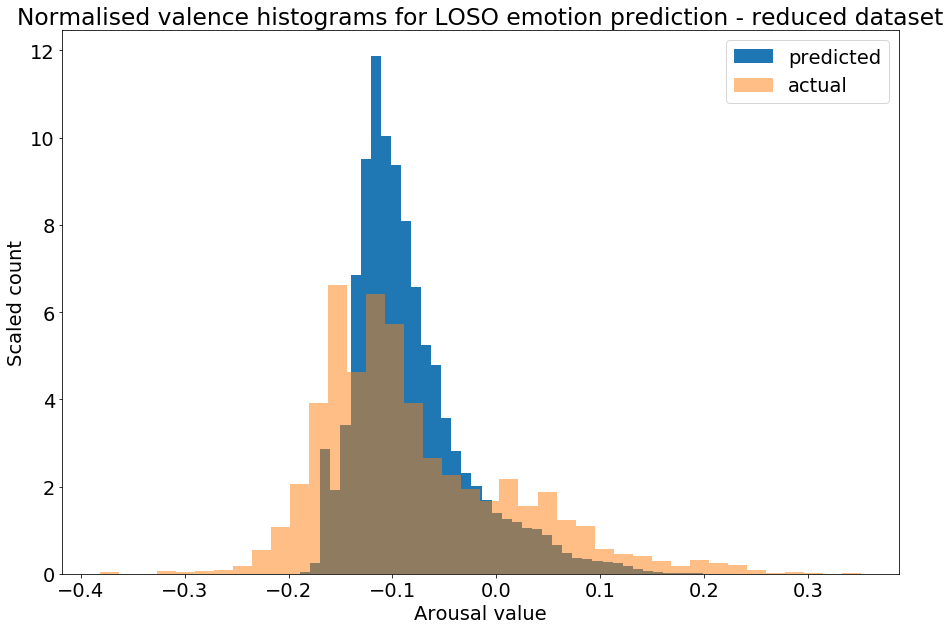

In [106]:
fig, ax = plt.subplots(figsize=(15,10))
matplotlib.rcParams.update({'font.size': 19.5})

plt.hist(predicted_arousals, bins=40, label='predicted', density=True)
plt.hist(actual_arousals, bins=40, alpha= 0.5, label='actual', density=True)
plt.xlabel("Arousal value")
plt.ylabel("Scaled count")
# plt.vlines(np.mean(predicted_valence), 0, 30, linestyles ="dotted", colors ="k") 
# plt.vlines(np.mean(actual_valence), 0, 30, linestyles ="dotted", colors ="r") 
plt.legend()
plt.title(f"Normalised valence histograms for LOSO emotion prediction - reduced dataset")

plt.show()